In [18]:
import getpass
import os
import pandas as pd
import numpy as np
import urllib.request
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
from lmfit import Model
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta  
import requests
import json
from io import StringIO

user="u410d"
#user="decimapc"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/%s/Google Drive/stefan/corona/max-elv-b92a39d5f6f2.json"%user


password = getpass.getpass()
def xor(s,t):
    return "".join(chr(ord(a)^ord(b)) for a,b in zip(s,t))

api_key=xor('z=6U%Az:W1*]\x1aYG\x08v&2J',password*3)

chart_studio.tools.set_credentials_file(username='spammie', api_key=api_key)


def expand_date(lastdate,n=7):
    lastdate_object = lastdate
    d=[]
    for i in range(n):
        nd=lastdate_object+timedelta(days=i+1)
        #d.append(nd.strftime("%m/%d/%y"))
        d.append(nd)
    return d

def expand_pd_date(lastdate,n=7):
    lastdate_object = lastdate
    d=[]
    for i in range(n):
        nd=lastdate_object+timedelta(days=i+1)
        #d.append(nd.strftime("%m/%d/%y"))
        d.append(pd.Timestamp(nd))
    return d


········


In [22]:
filen_ziek.encode('utf-8')

b'in-ziekenhuis-opgenomen-pati\xc3\xabnten-2020-04-12.csv'

In [25]:
import datetime
import urllib
dateparse = lambda x: (x.replace(' ','').replace("feb","/02/2020").replace('mrt','/03/2020').replace('apr','/04/2020'))


today=datetime.datetime.now()
datestr=today.strftime("%Y-%m-%d")
github="https://raw.githubusercontent.com/J535D165/CoronaWatchNL/master/raw_data/website_charts/"
#https://raw.githubusercontent.com/J535D165/CoronaWatchNL/master/raw_data/website_charts/overledenen-per-dag-2020-04-12.csv
filen_overl="overledenen-per-dag-%s.csv"%datestr


#https://raw.githubusercontent.com/J535D165/CoronaWatchNL/master/raw_data/website_charts/in-ziekenhuis-opgenomen-pati%C3%ABnten-2020-04-12.csv
filen_ziek="in-ziekenhuis-opgenomen-patiënten-%s.csv"%datestr
filen_ziek=urllib.parse.quote(filen_ziek)
df_ziek=pd.read_csv(github+filen_ziek, sep=";")
df_ziek=df_ziek.rename(columns={'GGD-meldingsdatum':'datum','tot en met gisteren':'oud'})
df_ziek['datum']=df_ziek['datum'].apply(dateparse)
df_ziek['toename']=df_ziek['nieuw']+df_ziek['oud']
#df_ziek['totaal']=df['toename'].cumsum()
df_ziek['totaal']=df_ziek['toename'].cumsum()
#df_ziek.plot(x='datum',y='totaal')
df_ziek['date']= pd.to_datetime(df_ziek.datum, format='%d/%m/%Y')
df_ziek

df_deaths=pd.read_csv(github+filen_overl, sep=";")
df_deaths=df_deaths.rename(columns={'Datum van overlijden':'datum','tot en met gisteren':'oud'})
df_deaths['datum']=df_deaths['datum'].apply(dateparse)
df_deaths['toename']=df_deaths['nieuw']+df_deaths['oud']
#df_ziek['totaal']=df['toename'].cumsum()
df_deaths['totaal']=df_deaths['toename'].cumsum()
#df_ziek.plot(x='datum',y='totaal')
df_deaths['date']= pd.to_datetime(df_deaths.datum, format='%d/%m/%Y')
df_deaths


,datum,nieuw,oud,toename,totaal,date
0,27/02/2020,0,0,0,0,2020-02-27
1,28/02/2020,0,0,0,0,2020-02-28
2,29/02/2020,0,0,0,0,2020-02-29
3,1/03/2020,0,0,0,0,2020-03-01
4,2/03/2020,0,0,0,0,2020-03-02
5,3/03/2020,0,0,0,0,2020-03-03
6,4/03/2020,0,0,0,0,2020-03-04
7,5/03/2020,0,0,0,0,2020-03-05
8,6/03/2020,0,1,1,1,2020-03-06
9,7/03/2020,0,1,1,2,2020-03-07


In [26]:
df_ziek

,datum,nieuw,oud,toename,totaal,date
0,27/02/2020,0,1,1,1,2020-02-27
1,28/02/2020,0,0,0,1,2020-02-28
2,29/02/2020,0,2,2,3,2020-02-29
3,1/03/2020,0,1,1,4,2020-03-01
4,2/03/2020,0,3,3,7,2020-03-02
5,3/03/2020,0,6,6,13,2020-03-03
6,4/03/2020,0,4,4,17,2020-03-04
7,5/03/2020,0,6,6,23,2020-03-05
8,6/03/2020,0,6,6,29,2020-03-06
9,7/03/2020,0,13,13,42,2020-03-07


In [33]:
# fit ic opnames
cases="cases"

upload_plots=False
#upload_plots=True

startdatum=pd.Timestamp(2020, 3, 3, 0).to_pydatetime()
ictot=[5,6,8,11,16,20,28,34,55,69,86,114,147,182,235,290,\
       375,449,519,621,728,843,942,1056,1153,1237,1315]


l=len(ictot)
dates=expand_pd_date(startdatum,n=l)
print(dates)

domain="https://stichting-nice.nl/"
cum_died_survive="/covid-19/public/died-and-survivors-cumulative/"
glob="/covid-19/public/global"
new_intake="/covid-19/public/new-intake/"
intake_count="/covid-19/public/intake-count/" 
intake_cum="/covid-19/public/intake-cumulative/"
ic_count="/covid-19/public/ic-count/"
age_distrib="/covid-19/public/age-distribution/"
age_died='/covid-19/public/age-distribution-died/'

def get_url(url):
    uri=domain+url
    #url="https://corona.lmao.ninja/v2/historical"
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    result = requests.get(uri, headers=headers)
    return result.content

q=get_url(intake_cum)

dd=pd.read_json(q,convert_dates=True)
a=json.loads(q)
intake=dd[['date','intakeCumulative']]

y=intake['intakeCumulative'][7:]
dates=intake['date'][7:]
#print(y)
#print(dates)
from lmfit import Model
def ef(x,L,tau):
    return L*np.power(2,x/tau)

y=np.array(y).astype(float)
print(y)
l=len(y)
x=np.arange(0, l,1, float)
gmodel = Model(ef)
params = gmodel.make_params(L=2000,tau=2)
print('parameter names: {}'.format(gmodel.param_names))
print('independent variables: {}'.format(gmodel.independent_vars))


#==============================
y1=np.array(y[-7:]).astype(float)
l1=len(y1)

y2=np.array(y[-14:-7]).astype(float)
l2=len(y2)
x1=np.arange(0, l1+l2,1, float)

result1 = gmodel.fit(y1, params,x=x1[-7:])
result2 = gmodel.fit(y2, params,x=x1[-14:-7])

print(result1.params)
print(result2.params)

#dates=qq['date']
# Create traces
#     l=len(x)
xdate1=dates[-7:]
xdate1=dates[-14:]
xdate2=dates[-14:-7]
yf1= gmodel.eval(result1.params, x=x1)
yf2= gmodel.eval(result2.params, x=x1)
#x=qq['date']
dt=xdate1.iloc[-1].to_pydatetime()
xdate_extra=expand_date(dt)
l=len(xdate_extra)
x_extra=np.arange(x1[-1]+1, x1[-1]+l,1, float)
y_extra=gmodel.eval(result1.params, x=x_extra).astype(int)

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates, y=y,
                         mode='markers',
                         name='counts NVIC',
                         marker_size=10,
                         marker_symbol='circle'))
fig.add_trace(go.Scatter(x=xdate1, y=yf1,
                         mode='lines',
                         name='last week: double every %.1f days'%result1.params['tau'].value))
fig.add_trace(go.Scatter(x=xdate1, y=yf2,
                         mode='lines',
                         name='week before: double every %.1f days'%result2.params['tau'].value))

fig.add_trace(go.Scatter(x=xdate_extra, y=y_extra,
                         mode='markers',
                         name='prediction',
                        marker_size=10,
                         marker_symbol='square'))
title="Corona patients on IC Netherlands"
yaxis_title="# patients"

fig.update_layout(yaxis_type="log",
                  title=title,
                  title_xanchor="center",
                  title_x=0.5,
                  xaxis_title="Date",
                  yaxis_title=yaxis_title,
                  legend_x=0.05,
                  legend_y=0.95,
                  font_size=12)

filename="corona_ic"
if upload_plots:
    py.plot(fig, filename = filename, auto_open=True)
fig.show()

l=len(y)
toename=y[1:]-y[:l-1]
ll=len(toename)
xx=np.arange(0, ll,1, float)
fig = go.Figure()
fig.add_trace(go.Bar(x=dates,y=toename))
title="Daily increase in Corona victims Netherlands" if cases == "cases" else "Daily increase in IC patients Netherlands"
yaxis_title="# patients/day"

fig.update_layout(title=title,
                  title_xanchor="center",
                  title_x=0.5,
                  xaxis_title="Date",
                  yaxis_title=yaxis_title,
                  legend_x=0.05,
                  legend_y=0.95,
                  font_size=12)
filename="corona_ic_increase"
if upload_plots:
    py.plot(fig, filename = filename, auto_open=True)
fig.show()

[Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-14 00:00:00'), Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('2020-03-24 00:00:00'), Timestamp('2020-03-25 00:00:00'), Timestamp('2020-03-26 00:00:00'), Timestamp('2020-03-27 00:00:00'), Timestamp('2020-03-28 00:00:00'), Timestamp('2020-03-29 00:00:00'), Timestamp('2020-03-30 00:00:00')]
[  14.   20.   26.   35.   43.   66.   80.   99.  126.  159.  194.  245.
  305.  

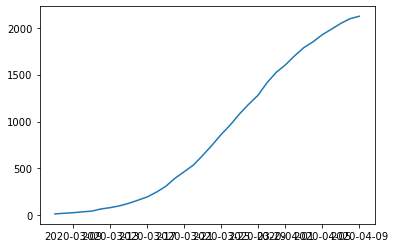

In [21]:
%matplotlib inline
plt.plot(dates,y)

In [34]:
#fit met logistic curve

from lmfit import Model
from lmfit import Parameters

upload_plots=False
upload_plots=True



def ef(x,L,tau):
    return L*np.power(2,x/tau)

def logistic(x,M,alpha,beta):
    return M/(1+np.exp(-beta*(x-alpha)))

def dif_log(x,M,alpha,beta):
    return beta*M*np.exp(-beta*(x-alpha))/np.power((1+np.exp(-beta*(x-alpha))),2)

#y=np.array(qq['number']).astype(float)
l=len(y)
x=np.arange(0, l,1, float)
gmodel = Model(logistic)
#params = gmodel.make_params(M=30000,alfa=65,beta=0.2)
params = Parameters()
params.add('M', value=1000, min=500,max=4000)
params.add('alpha', value=20,min=10,max=80)
params.add('beta', value=0.2, min=0.05,max=0.95)

x_start_fit=1
x_start_plot=1
print(x_start_fit)
print('parameter names: {}'.format(gmodel.param_names))
print('independent variables: {}'.format(gmodel.independent_vars))
result = gmodel.fit(y[x_start_fit:], params,x=x[x_start_fit:])

# %matplotlib notebook

# ax,_=result.plot()
# plt.yscale('log')
# result
#dates=qq['date']
xdate=dates[x_start_fit:]
yf= gmodel.eval(result.params, x=x[x_start_fit:])
#x=qq['date']
dt=xdate.iloc[-1].to_pydatetime()
xdate_extra=expand_date(dt)
l=len(xdate_extra)
x_extra=np.arange(x[-1]+1, x[-1]+l,1, float)
y_extra=gmodel.eval(result.params, x=x_extra).astype(int)

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates[x_start_plot:], y=y[x_start_plot:],
                         mode='markers',
                         name='counts RIVM',
                         marker_size=10,
                         marker_symbol='circle'))
fig.add_trace(go.Scatter(x=xdate, y=yf,
                         mode='lines',
                         name=r'K=%.2f,\beta=%.2f, t_0=%.2f'%\
                         (result.params['M'].value,result.params['beta'].value,result.params['alpha'].value)))

fig.add_trace(go.Scatter(x=xdate_extra, y=y_extra,
                         mode='markers',
                         name='prediction',
                        marker_size=10,
                         marker_symbol='square'))
title="Cummulative intake of patient on IC"
yaxis_title="# patients"

fig.update_layout(#yaxis_type="log",
                  title=title,
                  title_xanchor="center",
                  title_x=0.5,
                  xaxis_title="Date",
                  yaxis_title=yaxis_title,
                  legend_x=0.05,
                  legend_y=0.95,
                  font_size=12)

filename="corona_ic_logistic"
if upload_plots:
    py.plot(fig, filename = filename, auto_open=True)
fig.show()

M=beta=result.params['M'].value
alpha=result.params['alpha'].value
beta=result.params['beta'].value


fig = go.Figure()
fig.add_trace(go.Bar(x=dates[1:], y=toename))
#                          mode='markers',
#                          name='counts RIVM',
#                          marker_size=10,
#                          marker_symbol='circle'))
fig.add_trace(go.Scatter(x=xdate, y=dif_log(x+1,M,alpha,beta),
                         mode='lines',
                         name=r'K=%.2f,beta=%.2f, t_0=%.2f'%\
                         (result.params['M'].value,result.params['beta'].value,result.params['alpha'].value)))

title="Corona increase IC"
yaxis_title="# patients/day"

fig.update_layout(#yaxis_type="log",
                  title=title,
                  title_xanchor="center",
                  title_x=0.5,
                  xaxis_title="Date",
                  yaxis_title=yaxis_title,
                  legend_x=0.05,
                  legend_y=0.95,
                  font_size=12)

filename="corona_ic_logistic_increase"
if upload_plots:
    py.plot(fig, filename = filename, auto_open=True)
fig.show()

1
parameter names: ['M', 'alpha', 'beta']
independent variables: ['x']


<IPython.core.display.Javascript object>


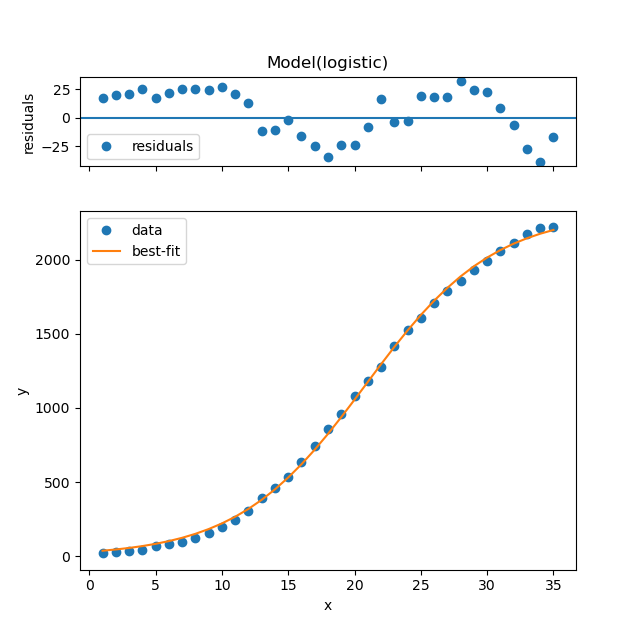

(<Figure size 640x640 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

In [22]:
result.plot()

In [35]:
from lmfit import Model
from lmfit import Parameters

upload_plots=False
upload_plots=True

def expand_date(lastdate,n=7):
    lastdate_object = lastdate
    d=[]
    for i in range(n):
        nd=lastdate_object+timedelta(days=i+1)
        #d.append(nd.strftime("%m/%d/%y"))
        d.append(nd)
    return d

def expand_pd_date(lastdate,n=7):
    lastdate_object = lastdate
    d=[]
    for i in range(n):
        nd=lastdate_object+timedelta(days=i+1)
        #d.append(nd.strftime("%m/%d/%y"))
        d.append(pd.Timestamp(nd))
    return d


def ef(x,L,tau):
    return L*np.power(2,x/tau)

def logistic(x,M,alpha,beta):
    return M/(1+np.exp(-beta*(x-alpha)))

def dif_log(x,M,alpha,beta):
    return beta*M*np.exp(-beta*(x-alpha))/np.power((1+np.exp(-beta*(x-alpha))),2)

y=df_deaths['oud']+df_deaths['nieuw']
dates=df_deaths['date']
#y=np.array(qq['number']).astype(float)
l=len(y)
x=np.arange(0, l,1, float)
gmodel = Model(dif_log)
#params = gmodel.make_params(M=30000,alfa=65,beta=0.2)
params = Parameters()
params.add('M', value=1000, min=500,max=4000)
params.add('alpha', value=20,min=10,max=80)
params.add('beta', value=0.2, min=0.05,max=0.95)


expmodel=Model(ef)
eparams = Parameters()
eparams.add('L', value=2000)
eparams.add('tau', value=2)


eresult = expmodel.fit(df_deaths['totaal'][:30], eparams,x=x[:30])

x_start_fit=1
x_start_plot=1
print(x_start_fit)
print('parameter names: {}'.format(gmodel.param_names))
print('independent variables: {}'.format(gmodel.independent_vars))
result = gmodel.fit(y[x_start_fit:-2], params,x=x[x_start_fit:-2])

# %matplotlib notebook

# ax,_=result.plot()
# plt.yscale('log')
# result
#dates=qq['date']
xdate=dates[x_start_fit:]
yf= gmodel.eval(result.params, x=x[x_start_fit:])
#x=qq['date']
dt=xdate.iloc[-1].to_pydatetime()
xdate_extra=expand_date(dt)
l=len(xdate_extra)
x_extra=np.arange(x[-1]+1, x[-1]+l,1, float)

M=beta=result.params['M'].value
alpha=result.params['alpha'].value
beta=result.params['beta'].value


fig = go.Figure()
fig.add_trace(go.Bar(x=dates, y=df_deaths['oud'],name="tot en met gisteren"))
fig.add_trace(go.Bar(x=dates, y=df_deaths['nieuw'],name='nieuw'))

#                          mode='markers',
#                          name='counts RIVM',
#                          marker_size=10,
#                          marker_symbol='circle'))
fig.add_trace(go.Scatter(x=xdate, y=dif_log(x+1,M,alpha,beta),
                         mode='lines',
                         name=r'K=%.2f,beta=%.2f, t_0=%.2f'%\
                         (result.params['M'].value,result.params['beta'].value,result.params['alpha'].value)))

title="Deaths per day"
yaxis_title="# deaths/day"

fig.update_layout(#yaxis_type="log",
                  title=title,
                  title_xanchor="center",
                  title_x=0.5,
                  xaxis_title="Date",
                  yaxis_title=yaxis_title,
                  legend_x=0.05,
                  legend_y=0.95,
                  font_size=12,
                    barmode='stack'
)

filename="corona_death_logistic_increase"
if upload_plots:
    py.plot(fig, filename = filename, auto_open=True)
fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates[x_start_plot:], y=df_deaths['totaal'][x_start_plot:],
                         mode='markers',
                         name='counts RIVM',
                         marker_size=10,
                         marker_symbol='circle'))
fig.add_trace(go.Scatter(x=np.concatenate((xdate.dt.to_pydatetime(),xdate_extra)), y=logistic(np.concatenate((x+1,x_extra+1)),M,alpha,beta),
                         mode='lines',
                         name=r'K=%.2f,beta=%.2f, t_0=%.2f'%\
                         (result.params['M'].value,result.params['beta'].value,result.params['alpha'].value)))
fig.add_trace(go.Scatter(x=xdate_extra, y=logistic(x_extra+1,M,alpha,beta),
                         mode='markers',
                         name='prediction',
                        marker_size=10,
                         marker_symbol='square'))

title="Cummulative deaths"
yaxis_title="# deaths"

fig.update_layout(#yaxis_type="log",
                  title=title,
                  title_xanchor="center",
                  title_x=0.5,
                  xaxis_title="Date",
                  yaxis_title=yaxis_title,
                  legend_x=0.05,
                  legend_y=0.95,
                  font_size=12)

filename="corona_death_logistic"
if upload_plots:
    py.plot(fig, filename = filename, auto_open=True)
fig.show()

1
parameter names: ['M', 'alpha', 'beta']
independent variables: ['x']


<IPython.core.display.Javascript object>


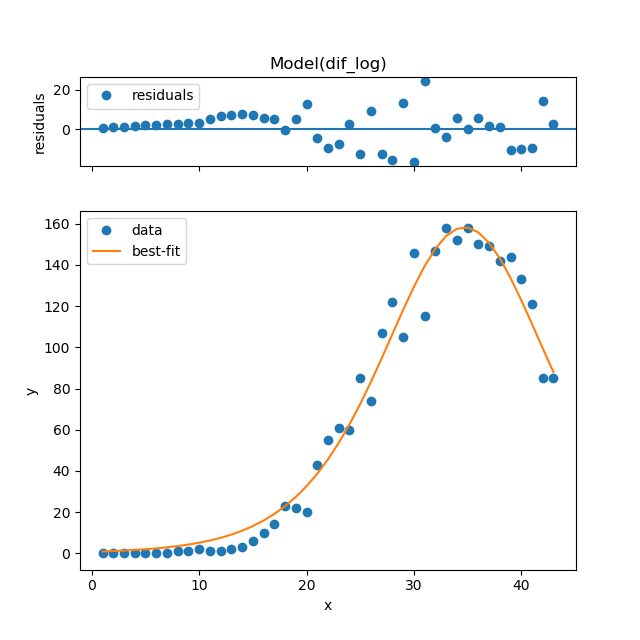

(<Figure size 640x640 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

In [31]:
%matplotlib notebook
result.plot()

<IPython.core.display.Javascript object>


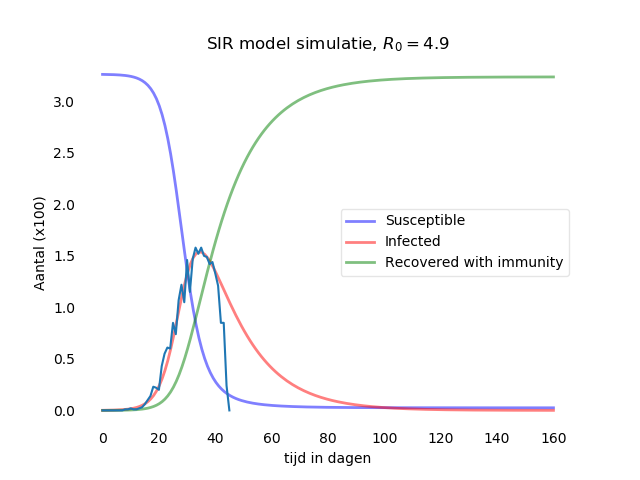

In [52]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib notebook

y=df_deaths['oud']+df_deaths['nieuw']
l=len(y)
x=np.arange(0, l,1, float)
# Total population, N.
N = M
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.35, 1./14
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(x,y/100)
ax.set_xlabel('tijd in dagen')
ax.set_ylabel('Aantal (x100)')
#ax.set_ylim(0,3)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
plt.title("SIR model simulatie, $R_0=%.1f$"%(beta/gamma))
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.show()

In [49]:
beta/gamma

4.9